In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import pickle as pkl

df = pd.DataFrame()
files = ['data_batch_{}'.format(i) for i in range(1, 6)] + ['test_batch']

def unpickle(file):
    with open(file, 'rb') as f:
        dictionary = pkl.load(f, encoding='bytes')
    return dictionary

In [3]:
mapping = unpickle('batches.meta')
mapping = [ elem.decode('utf-8') for elem in mapping[b'label_names'] ]
mapping

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
l_data = []
for file in files:
    d = unpickle(file)
    targets = list(map(lambda x: mapping[x], d[b'labels']))
    columns = [(color +'_'+ str(number)) for color in ['r', 'g', 'b'] for number in range(1, 1025)]
    data = pd.concat([pd.DataFrame(d[b'data'], columns=columns), pd.DataFrame(targets, columns=['target'])], axis=1)
    l_data.append(data)
data = pd.concat(l_data, axis=0, ignore_index=True)
data.head()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,frog
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,truck
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,truck
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,deer
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,automobile


In [5]:
data.tail()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
59995,76,76,77,76,75,76,76,76,76,78,...,185,177,223,239,239,235,236,234,236,ship
59996,81,91,98,106,108,110,80,84,88,90,...,107,143,155,156,160,173,129,147,160,cat
59997,20,19,15,15,14,13,12,11,10,9,...,112,68,50,52,52,51,50,53,47,dog
59998,25,15,23,17,23,51,74,91,114,137,...,84,83,84,79,78,78,80,81,80,automobile
59999,73,98,99,77,59,146,214,176,125,218,...,89,88,85,93,93,90,94,58,26,horse


In [6]:
data.shape

(60000, 3073)

In [7]:
cats = data[data['target'] == 'cat']
no_cats = data[data['target'] != 'cat']
print(cats.shape)
print(no_cats.shape)

(6000, 3073)
(54000, 3073)


In [8]:
select = no_cats.iloc[:6000]
print(select.shape)
select.head()

(6000, 3073)


,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,frog
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,truck
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,truck
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,deer
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,automobile


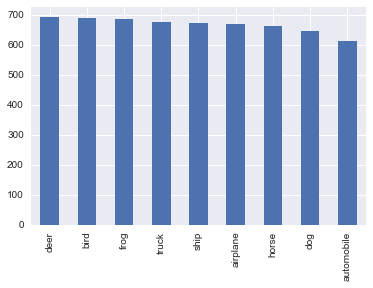

In [9]:
select['target'].value_counts().plot.bar();

In [10]:
select['target'] = ['no_cat' for i in range(len(select.index))]
final_data = pd.concat([cats, select], axis=0, ignore_index=True)
final_data.shape

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(12000, 3073)

In [11]:
final_data = final_data.sample(frac=1, random_state=0).reset_index(drop=True)
final_data.head()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
0,135,136,155,151,146,145,147,98,23,24,...,154,151,145,140,136,123,53,46,48,cat
1,19,21,86,173,208,224,227,227,237,237,...,25,31,33,27,23,25,28,35,37,no_cat
2,98,97,97,99,96,95,96,100,102,103,...,23,31,30,29,30,31,38,47,48,no_cat
3,231,221,211,208,210,209,208,207,207,207,...,188,188,188,188,188,188,187,187,187,no_cat
4,138,139,143,145,142,142,146,144,136,140,...,100,97,97,101,107,116,118,119,104,no_cat


In [12]:
final_data.tail()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
11995,98,104,110,115,119,102,69,49,46,46,...,186,196,187,175,147,81,93,130,113,cat
11996,109,125,151,161,137,152,169,184,190,178,...,67,65,99,111,112,87,80,82,112,cat
11997,198,197,198,198,198,199,200,200,200,200,...,215,216,216,217,217,216,216,216,216,no_cat
11998,141,124,130,140,155,155,158,162,155,153,...,165,159,153,146,142,137,130,125,123,no_cat
11999,62,61,65,91,98,107,121,129,132,123,...,153,122,63,64,64,65,68,87,124,cat


In [13]:
final_data.to_csv('../data.csv', index=False)